# Question 2

Develop a feed forward RBF neural network in python that classifies the images found in the MNIST dataset. You are to train your neural network using backpropagation. You should use gaussian functions as your radial basis functions. You must show that you have:

- Used K-means to design the hidden layer in your network.
- Performed K-fold cross correlation.
- Investigated the performance of your neural network for different sizes of hidden layer.

In [6]:
%matplotlib inline

import numpy as np
import json
from lib.RBFNetwork import RBFNetwork
from lib.util import *

with(open('config.json', 'r')) as f:
    config = json.load(f)

train_filename_gz = maybe_download(config['train']['images'], 9912422)
test_filename_gz = maybe_download(config['test']['images'], 1648877)
train_labels_gz = maybe_download(config['train']['labels'], 28881)
test_labels_gz = maybe_download(config['test']['labels'], 4542)

train_pickle = extract(train_filename_gz)
train_labels_pickle = extract(train_labels_gz)
test_pickle = extract(test_filename_gz)
test_labels_pickle = extract(test_labels_gz)

train_data = load_pickle(train_pickle)
train_labels = load_pickle(train_labels_pickle)
test_data = load_pickle(test_pickle)
test_labels = load_pickle(test_labels_pickle)

input_training = train_data.reshape(60000, 784)

Found and verified .cache\train-images-idx3-ubyte.gz
Attempting to download: t10k-images-idx3-ubyte.gz
0%....5%....10%....15%....20%....25%....30%....35%....40%....45%....50%....55%....60%....65%....70%....75%....80%....85%....90%....95%....100%Download Complete!
Found and verified .cache\t10k-images-idx3-ubyte.gz
Found and verified .cache\train-labels-idx1-ubyte.gz
Attempting to download: t10k-labels-idx1-ubyte.gz
0%180%Download Complete!
Found and verified .cache\t10k-labels-idx1-ubyte.gz
Pickling .cache\t10k-images-idx3-ubyte.pickle
Pickling .cache\t10k-labels-idx1-ubyte.pickle
Performing pickle.load(.cache\train-images-idx3-ubyte.pickle)
Performing pickle.load(.cache\train-labels-idx1-ubyte.pickle)
Performing pickle.load(.cache\t10k-images-idx3-ubyte.pickle)
Performing pickle.load(.cache\t10k-labels-idx1-ubyte.pickle)


For the purpose of the document, I've already cached a couple brains for testing in order to show that I have experimented various different values of K.

I'll display some information regarding each system, and then compare the accuracy statistics of each.

In [9]:
import dill
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def accuracy(net):
    plot = {
        "Accuracy": net.accuracy_list,
        "Confidence_Interval min": [net.confidence_interval[0]] * len(net.accuracy_list),
        "Confidence_Interval max": [net.confidence_interval[1]] * len(net.accuracy_list),
    }
    fig, ax = plt.subplots()
    errors = pd.DataFrame(plot)
    errors.plot(ax=ax)
    plt.title(BRAIN)
    plt.xlabel('Fold')
    plt.ylabel('Accuracy (Percentage)')
    plt.show()

Here we will test our first network configuration. This is an RBF network trained by K-Means clustering with K = 20.

Inspecting assets/brain1-v2.pickle
Mean accuracy: 0.7454
Confidence Interval: (0.70017655475309293, 0.7906234452469072)
Value of K: 20


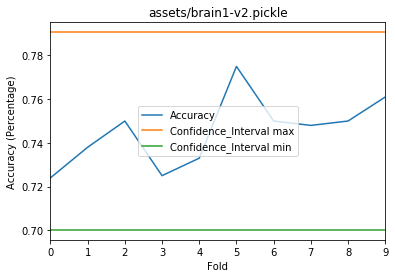

In [10]:
BRAIN = 'assets/brain1-v2.pickle'

net = pickle.load(open(BRAIN, 'rb'))

print 'Inspecting %s' % BRAIN
print 'Mean accuracy:', net.mean_accuracy
print 'Confidence Interval:', net.confidence_interval
print 'Value of K:', net.k

accuracy(net)

We now experiment with an RBF network trained by K-Means clustering with K = 30.

Inspecting assets/brain2-v1.pickle
Mean accuracy: 0.6907
Confidence Interval: (0.57852206099236803, 0.80287793900763194)
Value of K: 30


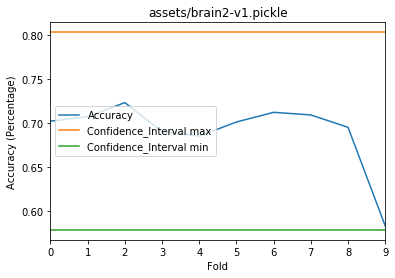

In [12]:
BRAIN = 'assets/brain2-v1.pickle'

net = pickle.load(open(BRAIN, 'rb'))

print 'Inspecting %s' % BRAIN
print 'Mean accuracy:', net.mean_accuracy
print 'Confidence Interval:', net.confidence_interval
print 'Value of K:', net.k

accuracy(net)

 The two *brains* here that have been computed are just cached instances of the neural network being trained. The system trains pretty slow, so I thought I'd include them for convenience sake. They can be found in the `assets` folder.

See `./a2-q2.py` for the implementation of the training to verify that I have completed the other objectives of the assignment problem.